<a href="https://colab.research.google.com/github/rilgilang/Capstone-Project-2/blob/main/Capstone_Project_2_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Data Pelanggan Supermarket
Proyek ini merupakan analisis mendalam terhadap data pelanggan dari sebuah supermarket, bertujuan untuk memahami pola perilaku pelanggan, preferensi produk, dan strategi pemasaran yang efektif.

# Latar Belakang
Supermarket saat ini menghadapi persaingan yang ketat dalam menarik dan mempertahankan pelanggan. Untuk mencapai keunggulan kompetitif, penting bagi perusahaan untuk memahami demografi dan perilaku pembelian pelanggan. Dengan analisis data yang tepat, perusahaan dapat mengidentifikasi segmen pelanggan yang potensial, preferensi produk, dan mengembangkan strategi pemasaran yang lebih efektif.

# Rumusan Masalah
Bagaimana distribusi usia dan pendapatan mempengaruhi pola pembelian pelanggan?
Produk apa saja yang sering dibeli bersama oleh pelanggan dan bagaimana hal ini dapat dimanfaatkan untuk meningkatkan penjualan?
Apakah ada segmen pelanggan dengan karakteristik unik yang dapat dijadikan target pemasaran khusus?
Bagaimana supermarket dapat mempersonalisasi penawaran produk untuk meningkatkan loyalitas pelanggan?

In [14]:
import pandas as pd


# Read sample data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_customer.csv', sep='\t')

# Display the first few rows of the dataframe (optional)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Pengecekan Nilai yang kosong

In [15]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Dari tabel diatas kita mengetahui bahwa field income mempunyai value yang kosong yang

# Penghapusan nilai yang kosong

In [16]:
df.dropna(inplace=True)

# Pengecekan ulang

In [17]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Pengecekan data duplikat

In [18]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Hasil pengecekan menunjukan tidak ada data data yang duplicate / yang memiliki nilai yang sama

# Data cleaning / Pembersihan data

In [19]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage', 'Number of Unique'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,ID,int64,2216,0,0.0,2216
1,Year_Birth,int64,2216,0,0.0,59
2,Education,object,2216,0,0.0,5
3,Marital_Status,object,2216,0,0.0,8
4,Income,float64,2216,0,0.0,1974
5,Kidhome,int64,2216,0,0.0,3
6,Teenhome,int64,2216,0,0.0,3
7,Dt_Customer,object,2216,0,0.0,662
8,Recency,int64,2216,0,0.0,100
9,MntWines,int64,2216,0,0.0,776


# Visualisasi Data

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# General Data


In [21]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Proposi status pernikahan pelanggan



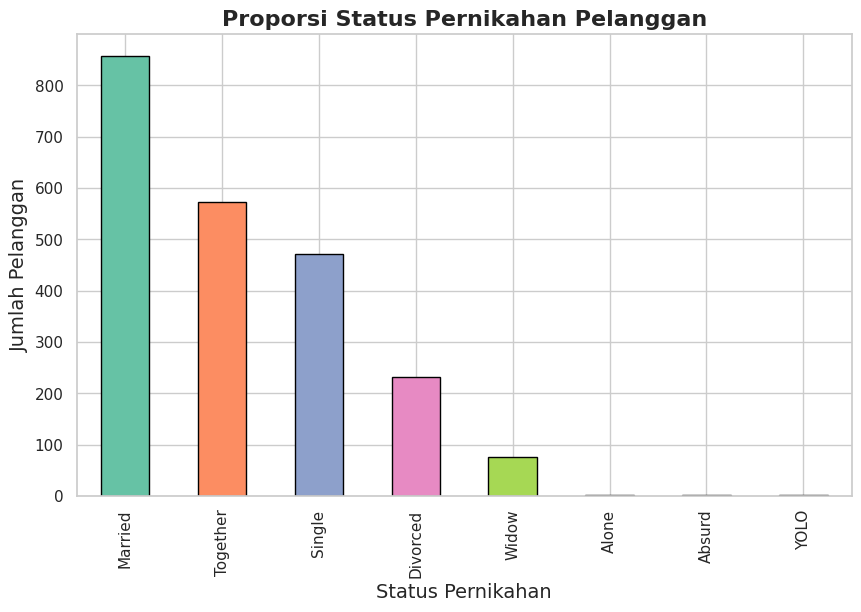

In [22]:

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot
df['Marital_Status'].value_counts().plot.bar(
    color=sns.color_palette('Set2'),
    edgecolor='black'
)

# Add title and labels
plt.title('Proporsi Status Pernikahan Pelanggan', fontsize=16, fontweight='bold')
plt.xlabel('Status Pernikahan', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)

# Show the plot
plt.show()

Pada bar chart diatas menunjukkan jumlah pelanggan berdasarkan status pernikahan mereka. Berikut adalah penjelasan lebih detail mengenai data yang ditampilkan:

1. Kategori Status Pernikahan:
  * **Married** (Menikah): Pelanggan dengan status menikah memiliki jumlah tertinggi, yaitu lebih dari 800 pelanggan.
  * **Together** (Bersama): Kategori ini mewakili pelanggan yang mungkin tinggal bersama tanpa menikah secara formal, dan jumlahnya sekitar 600 pelanggan.
  * **Single** (Lajang): Pelanggan yang belum menikah juga cukup banyak, dengan jumlah sekitar 500 orang.
  * **Divorced** (Bercerai): Pelanggan dengan status perceraian tercatat lebih rendah dibandingkan kategori sebelumnya, yaitu sekitar 300 orang.
  * **Widow** (Janda/Duda): Ini adalah kategori dengan jumlah paling sedikit di antara yang disebutkan sebelumnya, dengan jumlah pelanggan kurang dari 100.
  * **Alone** (Sendiri), Absurd (Tidak jelas), YOLO: Ketiga kategori ini memiliki jumlah yang sangat rendah hingga mendekati nol.

2. Distribusi Status Pernikahan:
  * **Mayoritas pelanggan** berada dalam kategori Married dan **Together**, yang menunjukkan bahwa banyak pelanggan berasal dari keluarga yang stabil.
  * Single dan Divorced menunjukkan variasi dalam status pernikahan pelanggan, yang bisa berkaitan dengan segmentasi pasar berdasarkan usia, preferensi produk, atau strategi pemasaran yang berbeda.
  * Widow (Janda/Duda) memiliki jumlah pelanggan yang kecil, yang mungkin menunjukkan bahwa segmen ini kurang terwakili dalam basis pelanggan atau mungkin kurang tertarik pada produk yang ditawarkan.

Analisis:
  * **Segmentasi Pelanggan**: Berdasarkan data ini, perusahaan dapat mempertimbangkan segmentasi pelanggan berdasarkan status pernikahan. Misalnya, pasangan yang menikah atau tinggal bersama mungkin tertarik pada produk tertentu yang berbeda dengan mereka yang lajang atau bercerai.
  * **Strategi Pemasaran**: Perusahaan dapat mengembangkan strategi pemasaran yang lebih terarah dengan mempertimbangkan status pernikahan pelanggan. Misalnya, menawarkan paket keluarga atau promosi khusus untuk pasangan yang sudah menikah.
  * **Diversifikasi Produk**: Kategori seperti "Single" dan "Divorced" juga menunjukkan pasar potensial untuk produk atau layanan yang mungkin lebih sesuai dengan kebutuhan mereka.

Visualisasi ini membantu memberikan wawasan mengenai bagaimana status pernikahan dapat mempengaruhi jumlah pelanggan dalam berbagai kategori, yang penting untuk pengambilan keputusan strategis dalam pemasaran dan pengembangan produk.

# Boxplot Outliers

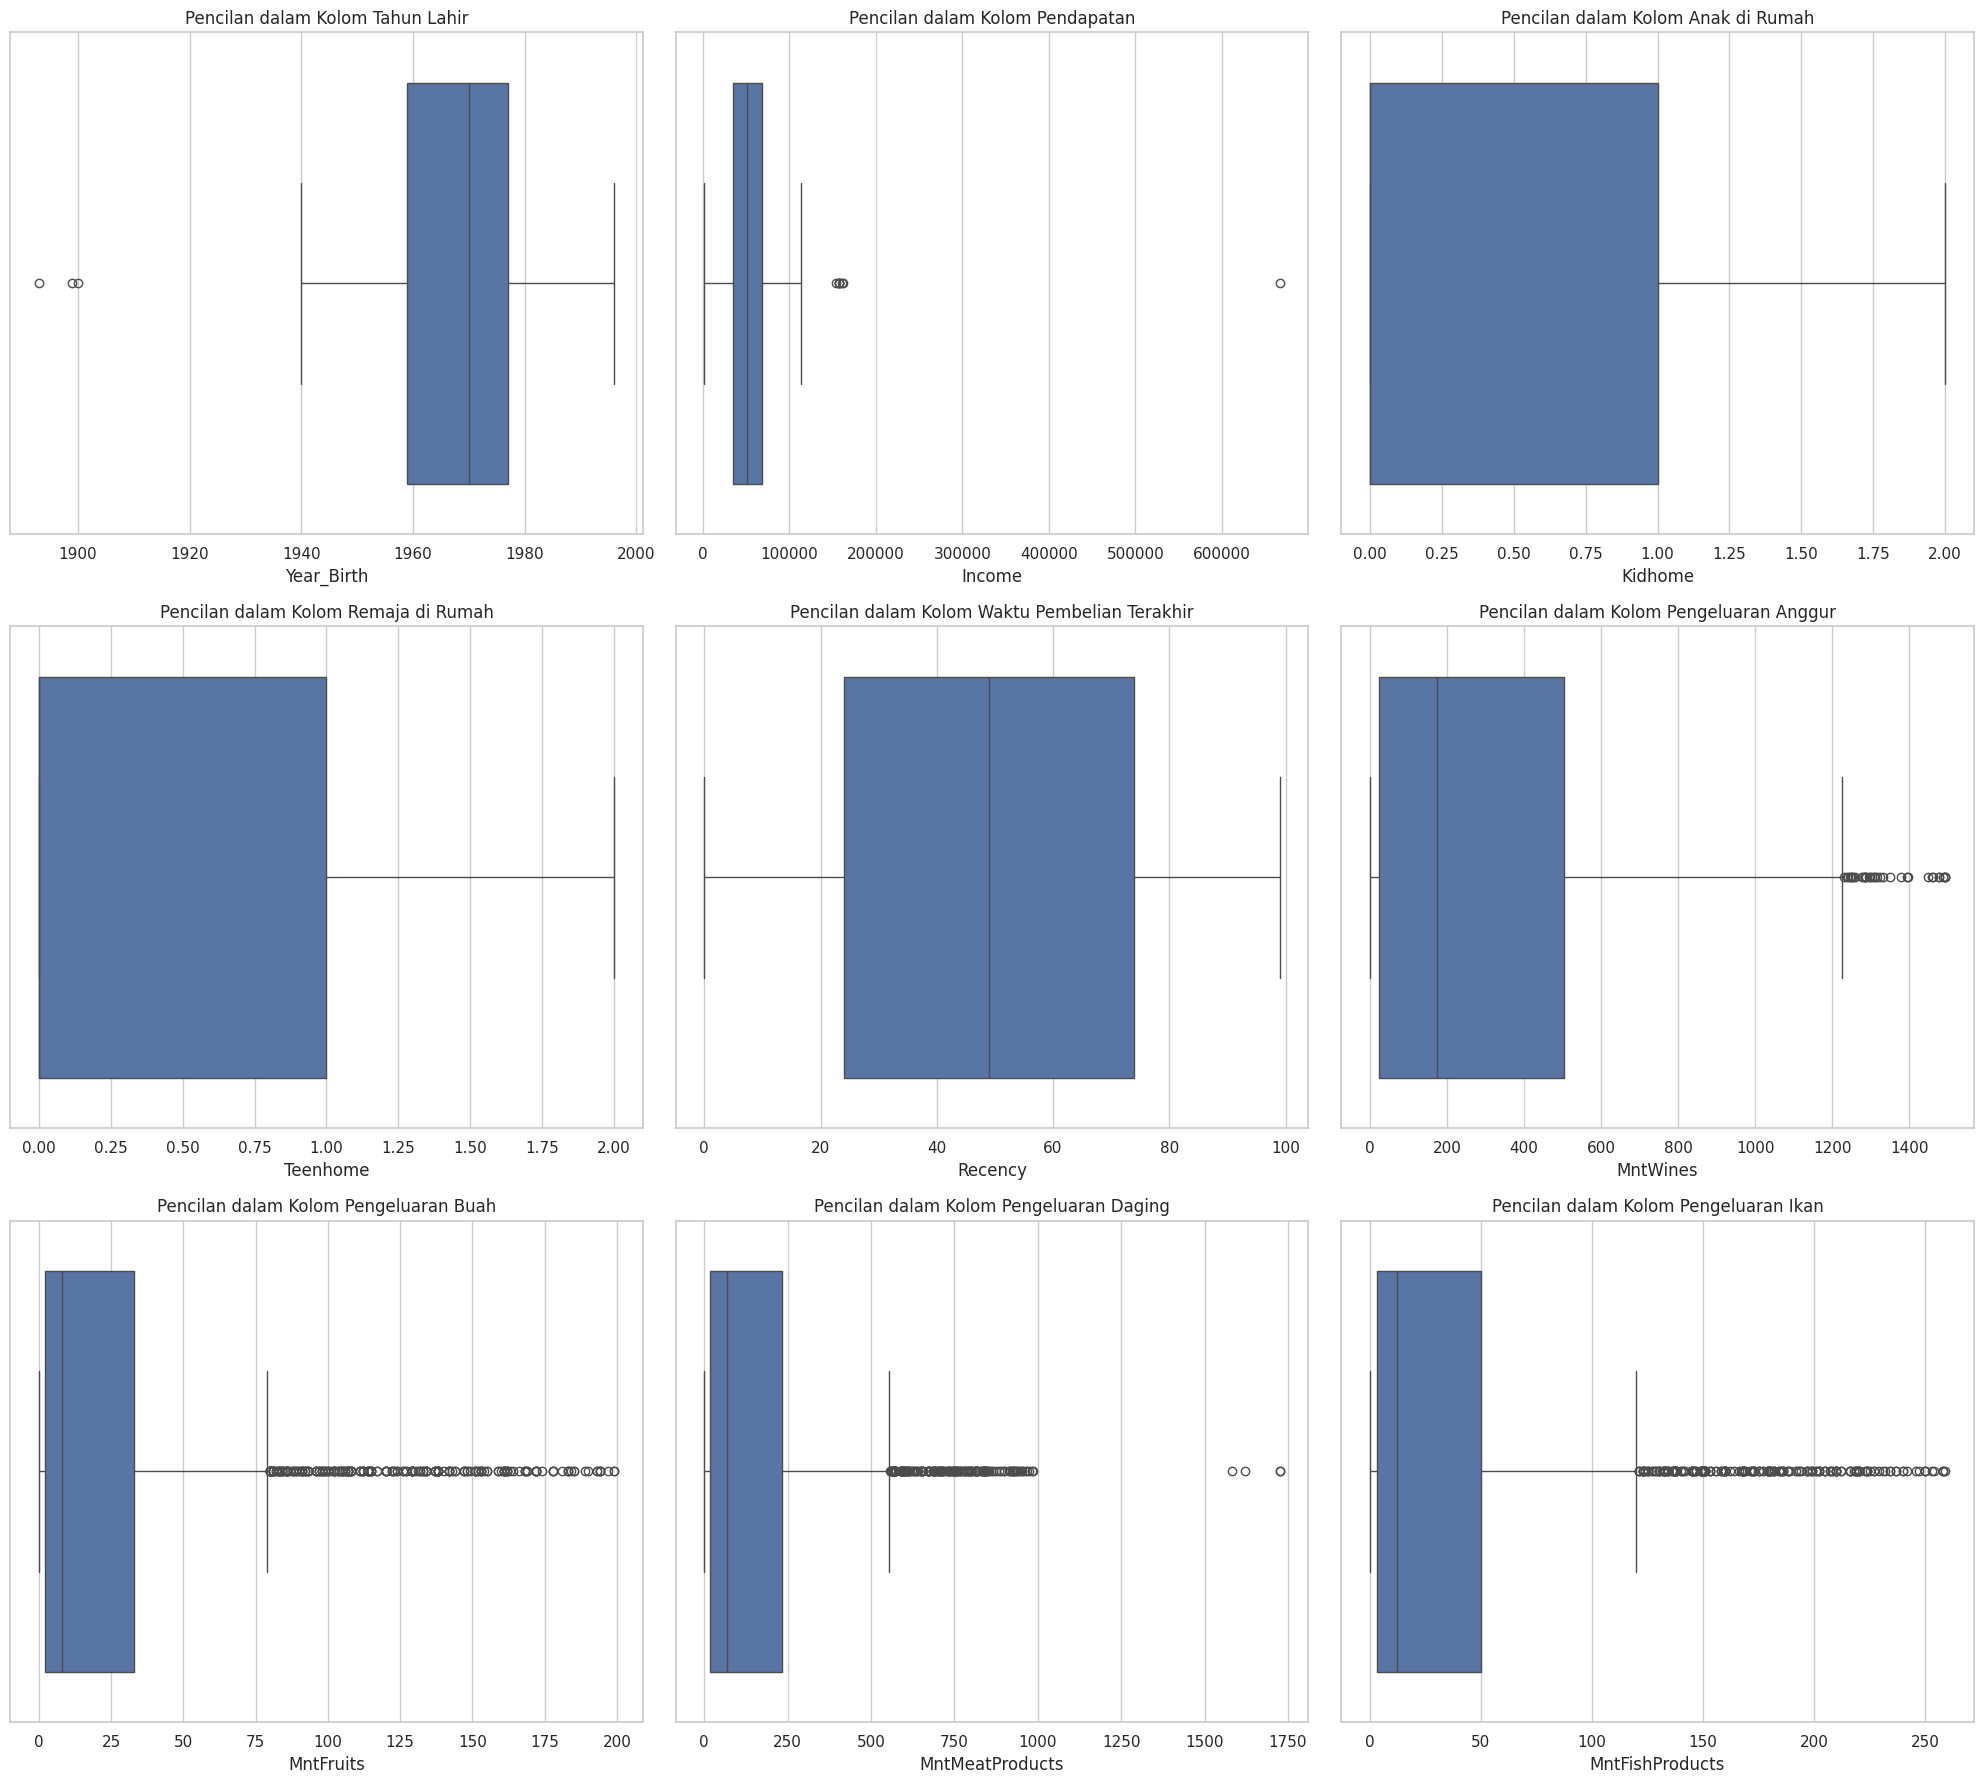

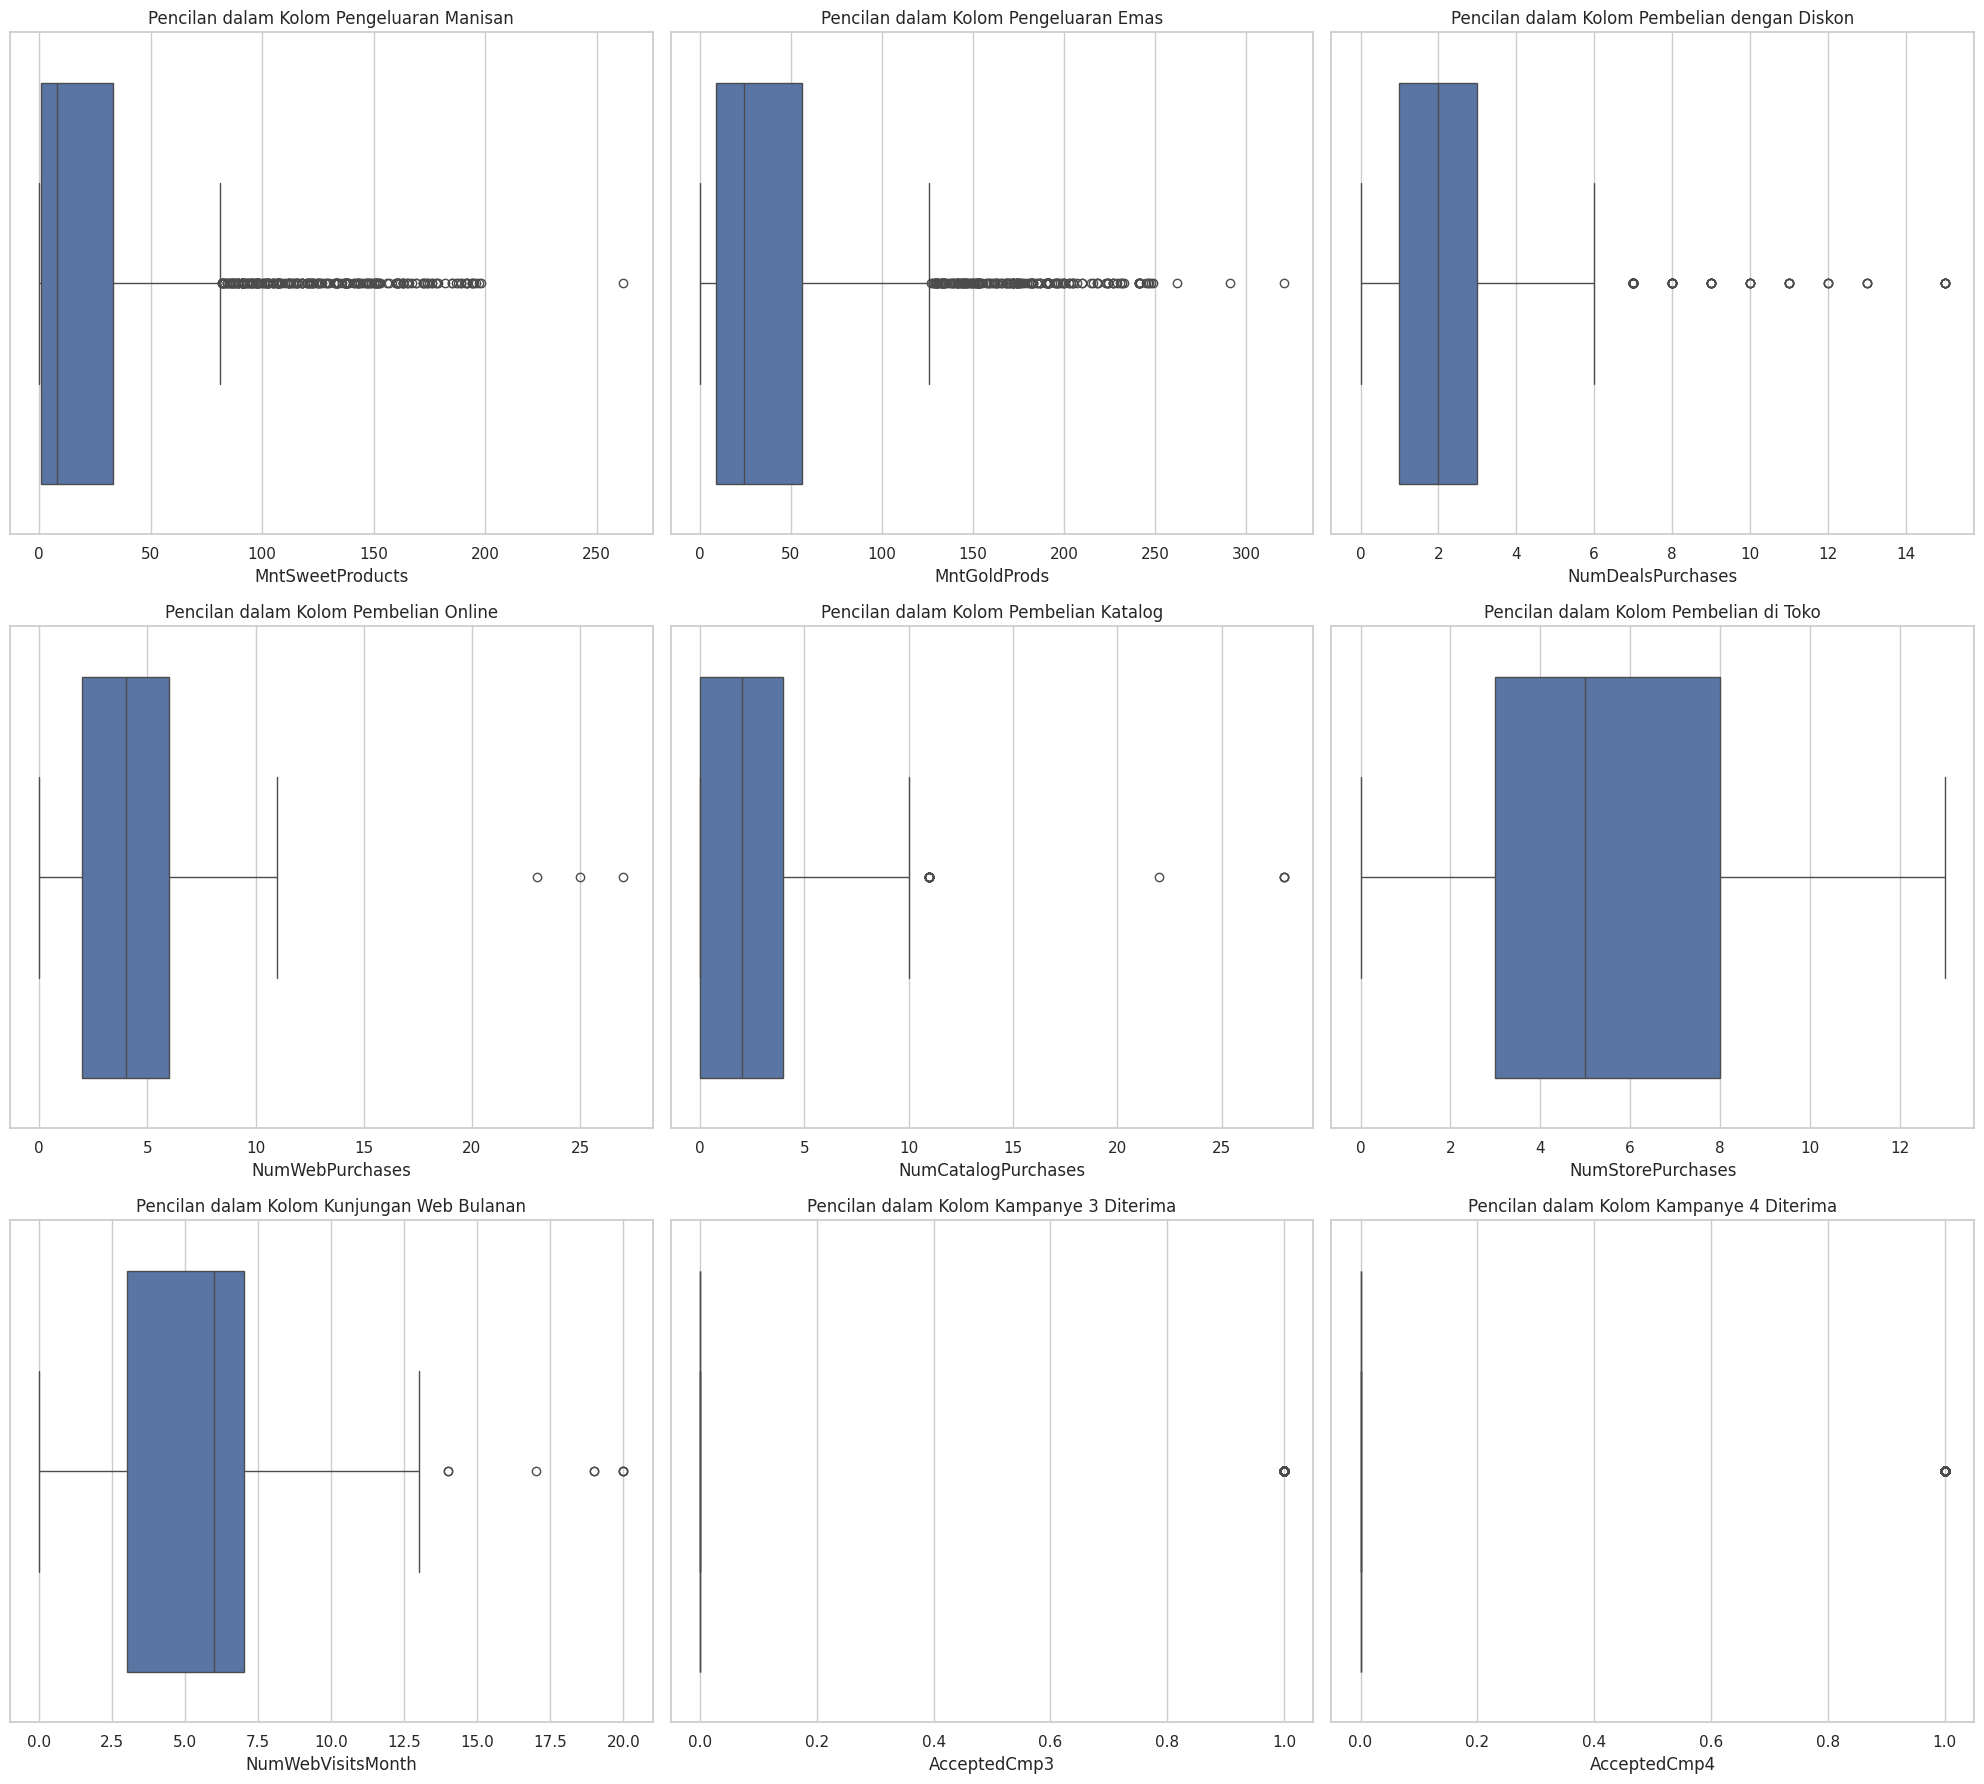

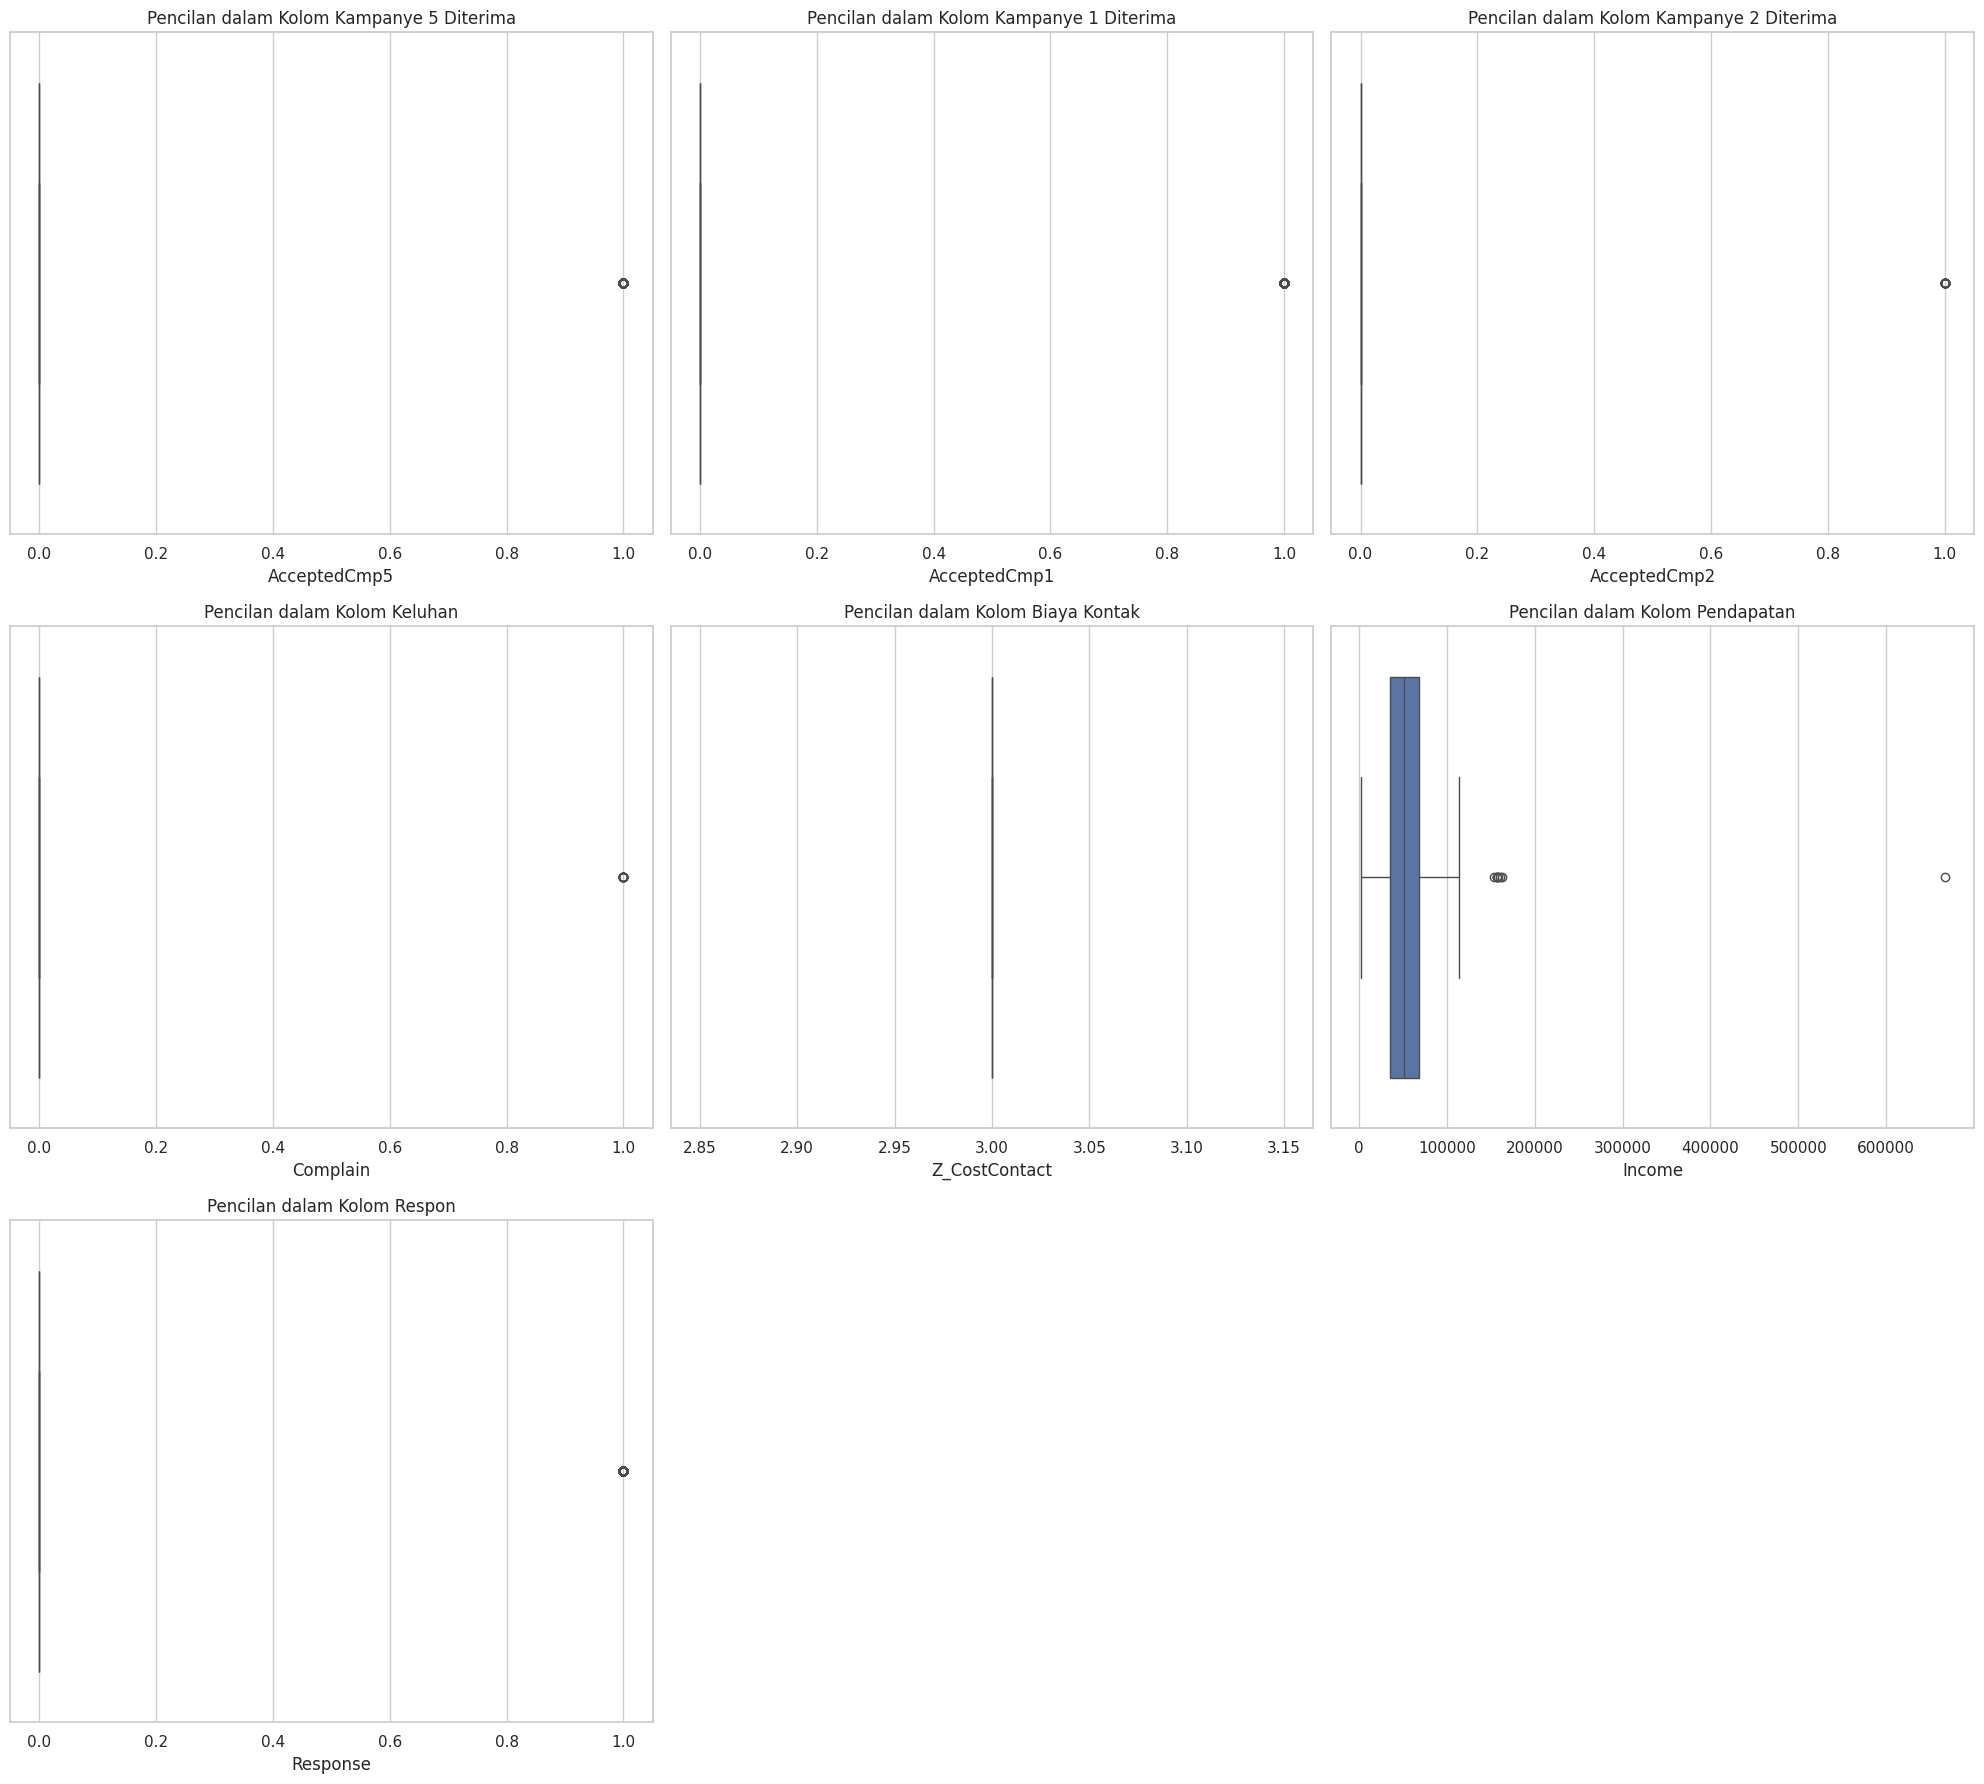

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom numerik yang ingin dianalisis dengan boxplot
numeric_columns = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Z_CostContact', 'Income', 'Response'
]

# Menghapus baris yang memiliki nilai kosong pada kolom numerik
df = df.dropna(subset=numeric_columns)

# Terjemahan nama kolom ke Bahasa Indonesia
indonesian_names = {
    'Year_Birth': 'Tahun Lahir',
    'Income': 'Pendapatan',
    'Kidhome': 'Anak di Rumah',
    'Teenhome': 'Remaja di Rumah',
    'Recency': 'Waktu Pembelian Terakhir',
    'MntWines': 'Pengeluaran Anggur',
    'MntFruits': 'Pengeluaran Buah',
    'MntMeatProducts': 'Pengeluaran Daging',
    'MntFishProducts': 'Pengeluaran Ikan',
    'MntSweetProducts': 'Pengeluaran Manisan',
    'MntGoldProds': 'Pengeluaran Emas',
    'NumDealsPurchases': 'Pembelian dengan Diskon',
    'NumWebPurchases': 'Pembelian Online',
    'NumCatalogPurchases': 'Pembelian Katalog',
    'NumStorePurchases': 'Pembelian di Toko',
    'NumWebVisitsMonth': 'Kunjungan Web Bulanan',
    'AcceptedCmp3': 'Kampanye 3 Diterima',
    'AcceptedCmp4': 'Kampanye 4 Diterima',
    'AcceptedCmp5': 'Kampanye 5 Diterima',
    'AcceptedCmp1': 'Kampanye 1 Diterima',
    'AcceptedCmp2': 'Kampanye 2 Diterima',
    'Complain': 'Keluhan',
    'Z_CostContact': 'Biaya Kontak',
    'Response': 'Respon'
}

# Membagi dataset menjadi beberapa bagian
chunks = [numeric_columns[i:i + 9] for i in range(0, len(numeric_columns), 9)]

# Loop untuk setiap chunk
for chunk in chunks:
    plt.figure(figsize=(20, 18))
    for i, col in enumerate(chunk):
        # Pastikan kolom ada dalam DataFrame dan bertipe numerik
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.subplot(3, 3, i + 1)  # Membuat subplot grid dengan 3x3
            sns.boxplot(x=df[col])
            # Gunakan nama kolom dalam Bahasa Indonesia jika tersedia
            title = indonesian_names.get(col, col)
            plt.title(f'Pencilan dalam Kolom {title}')
        else:
            print(f"Kolom {col} tidak ada atau bukan numerik.")
    plt.tight_layout()
    plt.show()

Pada Histogram diatas dapat kita lihat
1. Distribusi Usia Pelanggan:
  *   Puncak Distribusi: Histogram menunjukkan bahwa  mayoritas pelanggan berada pada kisaran usia sekitar 40 hingga 65 tahun. Ini terlihat dari puncak yang berada di sekitar rentang usia tersebut.
  *   Usia Terbanyak: Usia yang paling umum (dengan jumlah pelanggan terbanyak) tampaknya berada di sekitar 50 tahun. Ini ditunjukkan oleh bilah tertinggi di histogram.

2. Persebaran Usia:
  *   Kebanyakan Usia: Kebanyakan pelanggan berada dalam rentang usia produktif, yaitu sekitar 35 hingga 70 tahun.
  *   Usia Lanjut: Terdapat beberapa pelanggan yang berusia lebih dari 80 tahun, meskipun jumlahnya lebih sedikit. Ini menunjukkan bahwa ada pelanggan yang cukup lanjut usia, tetapi tidak banyak.
  *   Pelanggan Muda: Terdapat beberapa pelanggan yang lebih muda (sekitar 20-30 tahun), tetapi jumlahnya juga relatif kecil.
3. Tail Distribusi:
  * Kiri dan Kanan: Histogram memiliki sedikit ekor di kedua sisi. Ekor kiri (pelanggan yang lebih muda) lebih pendek dibandingkan ekor kanan (pelanggan yang lebih tua), tetapi keduanya relatif kecil.
  * Distribusi Tidak Simetris: Histogram menunjukkan sedikit kemiringan ke arah kanan, artinya ada lebih banyak pelanggan yang lebih tua (di atas 50 tahun) daripada pelanggan yang lebih muda.
4. Kepadatan Kernel (KDE):
  * Garis KDE: Garis biru halus di atas histogram menunjukkan estimasi kepadatan kernel (KDE), yang memberikan gambaran halus tentang distribusi usia.
  * Puncak KDE: Puncak KDE bertepatan dengan puncak histogram, menegaskan bahwa mayoritas pelanggan berada di sekitar usia 50 tahun.

**Kesimpulan:**
    Dari histogram ini, bisa di simpulkan bahwa pelanggan kebanyakan berada di usia paruh baya hingga usia lanjut. Ada sangat sedikit pelanggan yang sangat muda atau sangat tua. Dengan demikian, strategi pemasaran mungkin perlu difokuskan pada kelompok usia yang paling dominan, yaitu sekitar 40-65 tahun.

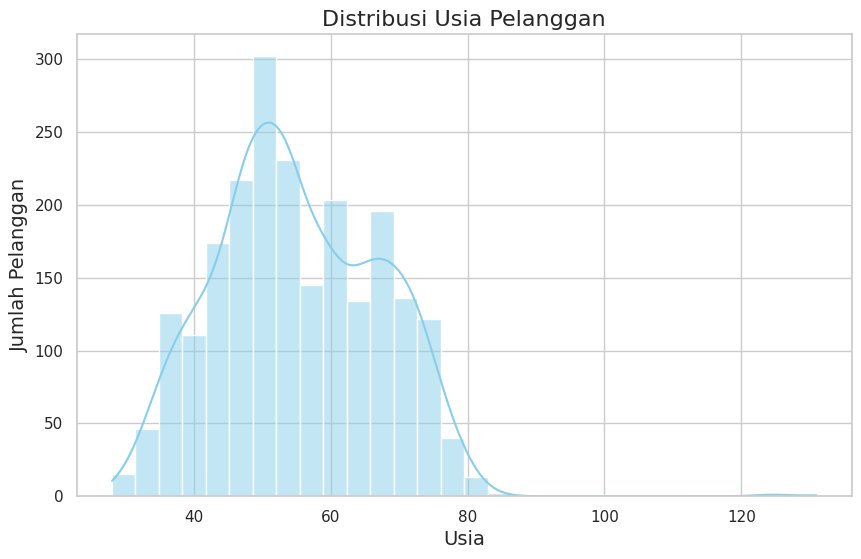

In [24]:
import datetime


# Hitung usia berdasarkan tahun kelahiran
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Plot histogram dengan usia
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan', fontsize=16, fontweight='light')
plt.xlabel('Usia', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.show()

# Rata rata pendapatan barang berdasarkan status pernikahan pelanggan

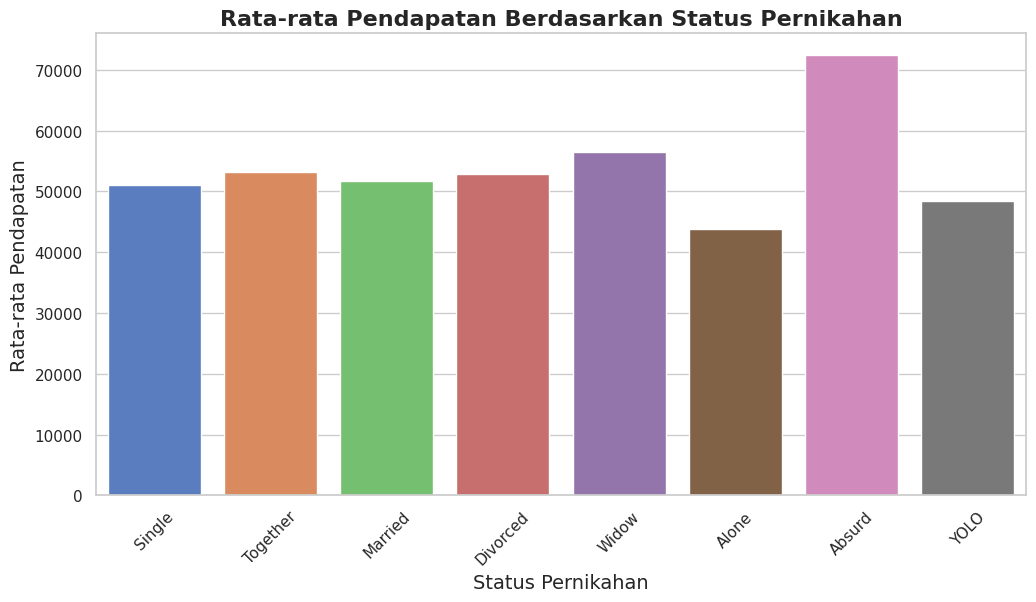

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Income', hue='Marital_Status', data=df, errorbar=None, palette='muted', dodge=False, legend=False)
plt.title('Rata-rata Pendapatan Berdasarkan Status Pernikahan', fontsize=16, fontweight='bold')
plt.xlabel('Status Pernikahan', fontsize=14)
plt.ylabel('Rata-rata Pendapatan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Heatmap Pembelian Produk

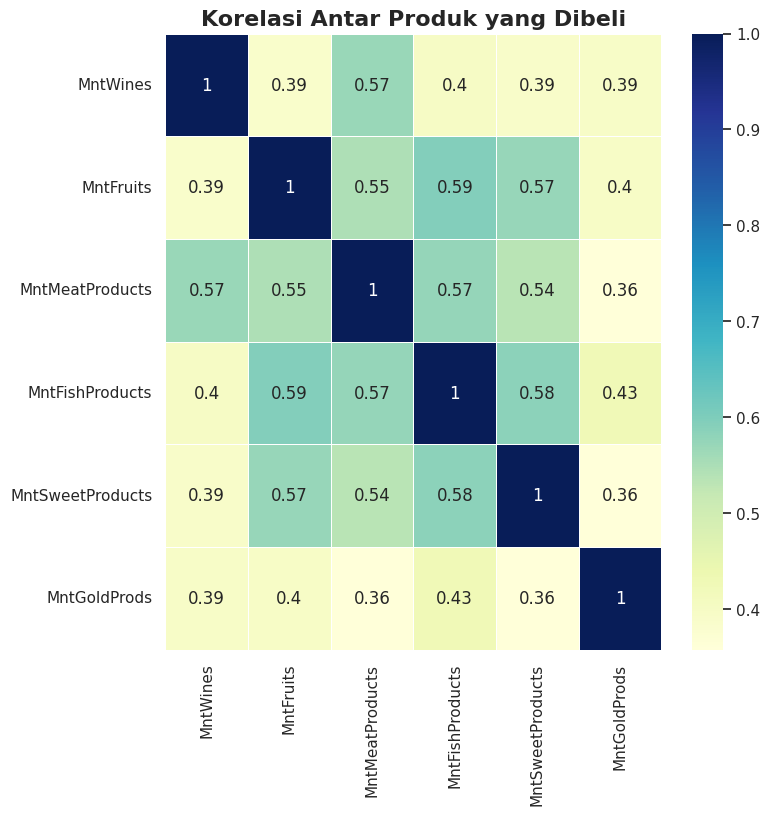

In [26]:
plt.figure(figsize=(8, 8))
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.heatmap(df[product_cols].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Korelasi Antar Produk yang Dibeli', fontsize=16, fontweight='bold')
plt.show()

pada heatmap diatas menunjukkan korelasi antar produk yang dibeli oleh pelanggan, di mana nilai korelasi diwakili oleh warna dan angka yang ditampilkan di dalam kotak.

Penjelasan:
  * MntWines: Mengacu pada jumlah pengeluaran untuk anggur.
  * MntFruits: Mengacu pada jumlah pengeluaran untuk buah-buahan.
  * MntMeatProducts: Mengacu pada jumlah pengeluaran untuk produk daging.
  * MntFishProducts: Mengacu pada jumlah pengeluaran untuk produk ikan.
  * MntSweetProducts: Mengacu pada jumlah pengeluaran untuk produk manis.
  * MntGoldProds: Mengacu pada jumlah pengeluaran untuk produk emas.

Interpretasi Warna dan Angka:
  * Korelasi Positif: Angka korelasi berkisar antara 0 dan 1, di mana 1 menunjukkan korelasi sempurna (keduanya selalu berubah bersama-sama), dan angka yang lebih tinggi menunjukkan korelasi yang lebih kuat. Warna semakin gelap mendekati 1 menunjukkan korelasi yang lebih kuat.
  * Korelasi Negatif: Tidak ada nilai negatif dalam heatmap ini, sehingga semua produk menunjukkan korelasi positif dalam berbagai derajat.

Analisis Korelasi:
  * Korelasi Tertinggi:
MntMeatProducts dan MntFishProducts: Kedua produk ini memiliki korelasi yang cukup kuat, yaitu sebesar 0.57. Ini menunjukkan bahwa pelanggan yang sering membeli produk daging cenderung juga membeli produk ikan.
  * MntMeatProducts dan MntWines: Juga memiliki korelasi sebesar 0.57, menunjukkan adanya kecenderungan pelanggan yang membeli daging juga membeli anggur.
  * MntFruits dan MntFishProducts: Memiliki korelasi 0.59, menandakan hubungan kuat antara pembelian buah-buahan dan ikan.
  * MntFruits dan MntSweetProducts: Korelasi sebesar 0.57 menunjukkan bahwa pembelian buah-buahan sering berkaitan dengan pembelian produk manis.

Korelasi Rendah:
  * MntGoldProds (Produk Emas) memiliki korelasi terendah dengan produk lain, khususnya dengan MntMeatProducts (0.36). Ini menandakan bahwa pembelian produk emas cenderung tidak terlalu berhubungan dengan pembelian produk lain.

Kesimpulan:
  * Pengelompokan Produk: Dari heatmap ini, kita dapat melihat bahwa produk makanan seperti daging, ikan, dan buah-buahan cenderung dibeli bersama. Sedangkan produk emas (MntGoldProds) tidak menunjukkan korelasi yang kuat dengan produk lainnya, yang mungkin mengindikasikan bahwa pembelian produk emas adalah sesuatu yang lebih spesifik dan terpisah dari pola konsumsi sehari-hari.
  * Strategi Pemasaran: Pemahaman ini bisa digunakan untuk merancang paket promosi yang menargetkan produk yang sering dibeli bersama, seperti daging dan anggur, atau buah-buahan dan produk manis.
  
Visualisasi ini memberikan wawasan tentang bagaimana pelanggan mungkin memiliki kebiasaan pembelian yang terkait satu sama lain, yang bisa menjadi dasar untuk strategi pemasaran yang lebih efektif.

# Rata rata pendapatan berdasarkan status pernikahan dan pendidikan

<ipython-input-27-6e4a47b8617f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Marital_Status', y='Income', hue='Education', data=df, ci=None, palette='Paired')


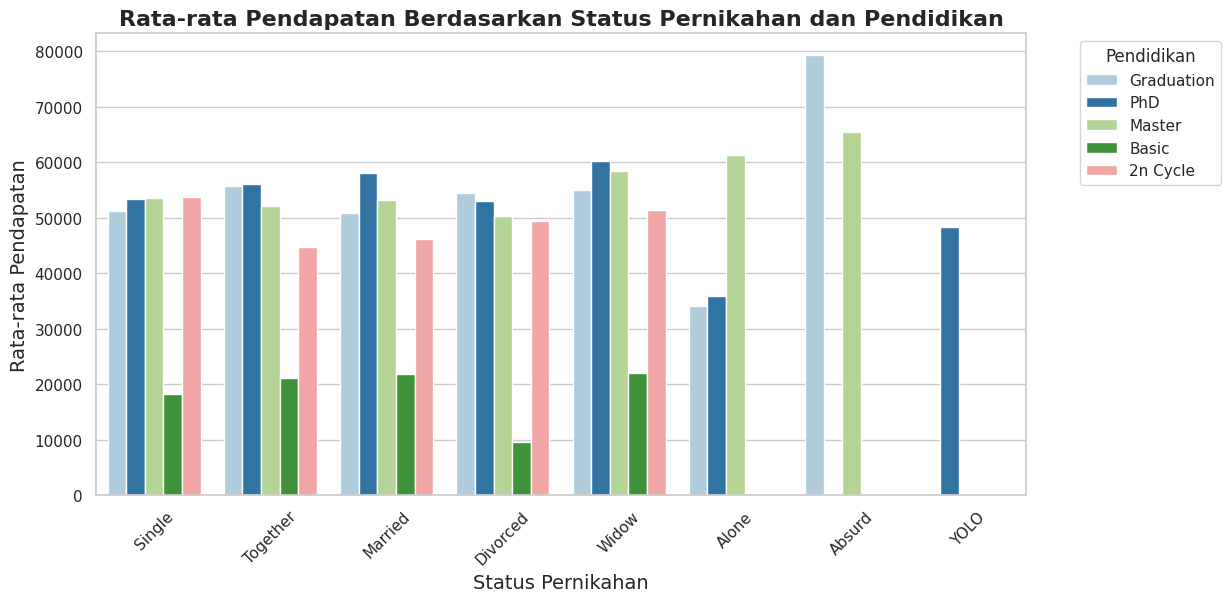

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Income', hue='Education', data=df, ci=None, palette='Paired')
plt.title('Rata-rata Pendapatan Berdasarkan Status Pernikahan dan Pendidikan', fontsize=16, fontweight='bold')
plt.xlabel('Status Pernikahan', fontsize=14)
plt.ylabel('Rata-rata Pendapatan', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Pendidikan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Kesimpulan**
Berdasarkan data yang telah dijabarkan, berikut adalah kesimpulan utama:

1. Distribusi Status Pernikahan Pelanggan:
  * Sebagian besar pelanggan berada dalam status pernikahan "Married" dan "Together," menunjukkan bahwa kelompok ini adalah mayoritas dari basis pelanggan.
  * Status seperti "Widow," "Alone," "Absurd," dan "YOLO" memiliki representasi yang sangat kecil.

2. Rata-rata Pendapatan Berdasarkan Status Pernikahan:
  * Pelanggan dengan status pernikahan "Absurd" memiliki rata-rata pendapatan tertinggi, jauh melebihi status lainnya.
  * Rata-rata pendapatan pelanggan dengan status "Married," "Together," dan "Single" cukup seimbang, sementara status "Alone" memiliki rata-rata pendapatan yang lebih rendah.

3. Korelasi Antar Produk yang Dibeli:
  * Terdapat korelasi yang signifikan antara pembelian produk daging, ikan, dan anggur, yang menunjukkan bahwa pelanggan yang membeli satu jenis produk cenderung membeli jenis produk lainnya.
  * Produk emas menunjukkan korelasi yang lemah dengan produk lainnya, yang mungkin menunjukkan bahwa pembelian produk emas lebih bersifat spesifik dan tidak terkait dengan pola pembelian produk makanan.

**Saran untuk Pengembangan Strategi Berdasarkan Analisis Data**

1. Segmentasi dan Targeting:
  * Segmentasi Berdasarkan Status Pernikahan: Mengingat bahwa "Married" dan "Together" adalah segmen terbesar, pertimbangkan untuk mengembangkan kampanye pemasaran yang secara khusus menargetkan kebutuhan dan preferensi dari kelompok ini.
  * Targeting Berdasarkan Pendapatan: Pelanggan dengan status "Absurd" memiliki pendapatan tertinggi. Ini bisa menjadi target untuk produk atau layanan premium. Segmentasi lebih lanjut berdasarkan analisis demografis tambahan bisa memperkuat strategi ini.

2. Pengembangan Produk dan Bundling:
  * Bundle Produk yang Sering Dibeli Bersama: Mengingat korelasi yang kuat antara pembelian daging, ikan, dan anggur, pertimbangkan untuk menawarkan paket atau bundling produk ini untuk meningkatkan penjualan silang (cross-selling).
  * Pemasaran Produk Emas: Produk emas yang memiliki korelasi rendah dengan produk lainnya bisa dipromosikan secara terpisah dengan strategi yang menekankan keunikan atau nilai eksklusifnya.

3. Penggunaan Data untuk Personalization:
  * Gunakan wawasan dari korelasi produk untuk menawarkan rekomendasi produk yang dipersonalisasi kepada pelanggan. Sebagai contoh, jika pelanggan sering membeli daging, tawarkan anggur atau ikan sebagai tambahan.

4. Eksplorasi Anomali atau Kelompok Khusus:
  * Status "Absurd" dan "YOLO" yang unik dan memiliki ciri-ciri pendapatan yang tidak biasa perlu dieksplorasi lebih lanjut. Analisis lebih dalam bisa membantu memahami apakah ini anomali data atau ada segmen pelanggan yang sebenarnya, yang bisa menjadi peluang baru.

5.Analisis Lanjutan:
  * Clustering: Lakukan analisis clustering untuk mengidentifikasi kelompok pelanggan berdasarkan perilaku pembelian dan demografi lainnya, yang bisa membantu dalam penargetan lebih lanjut.
  * Predictive Analytics: Gunakan model prediktif untuk memperkirakan produk apa yang mungkin dibeli oleh pelanggan berdasarkan sejarah pembelian mereka dan profil demografis, sehingga dapat meningkatkan efisiensi kampanye pemasaran.
  
Dengan implementasi saran-saran ini, diharapkan strategi bisnis yang lebih terarah dan efektif dapat tercapai, meningkatkan kepuasan pelanggan serta memaksimalkan keuntungan perusahaan.

Export clean data

In [28]:
# Assuming 'df' is your DataFrame
df.to_csv('capstone_project_2.csv', index=False)
df.to_excel('capstone_project_2.xlsx', index=False)
